#  AIR QUALITY INDEX (AQI) PREDICTION USING DEEP LEARNING

In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the preprocessed India dataset from a CSV file
preprocessed_india_data = pd.read_csv('../Preprocessed Data/preprocessed_india_air_quality.csv')
preprocessed_india_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
1,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
2,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
3,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
4,Amaravati,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate


In [3]:
feature_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

In [4]:
# Splitting the dataset into features (X) and target (y)
X = preprocessed_india_data[feature_columns]
y = preprocessed_india_data['AQI']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Defining and compiling the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\phamt\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Training the model
history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 28009.4062 - val_loss: 19324.0488
Epoch 2/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13977.1357 - val_loss: 4764.3354
Epoch 3/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4008.5105 - val_loss: 3085.7166
Epoch 4/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2693.8533 - val_loss: 2085.4451
Epoch 5/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1849.0056 - val_loss: 1512.8398
Epoch 6/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1476.0858 - val_loss: 1222.0618
Epoch 7/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1215.5256 - val_loss: 1044.2404
Epoch 8/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1106.8737 - val_loss: 948.5408
Epoch 9/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 972.8835 - val_loss: 873.2764
Epoch 10/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 910.7764 - val_loss: 823.6368
Epoch 11/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 782.0427 

In [8]:
# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error on Test Data:", loss)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 508.2968 
Mean Squared Error on Test Data: 458.26025390625


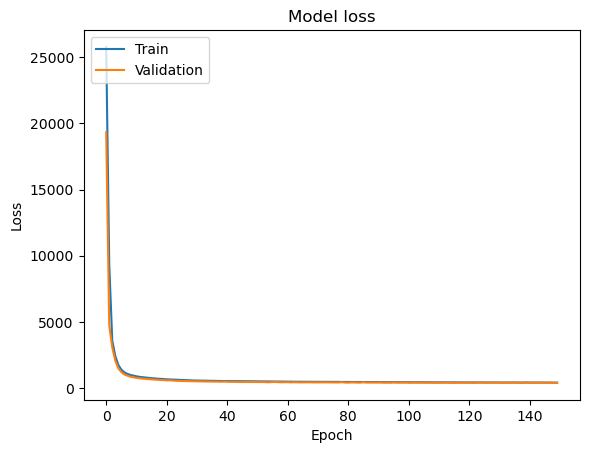

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [10]:
# Save the trained model
import os

# Create Saved Model directory if it doesn't exist (going up one level first)
os.makedirs("../Saved Model", exist_ok=True)

# Save the model
model.save('../Saved Model/aqi_prediction_model.h5')

print("Model saved successfully to: ../Saved Model/aqi_prediction_model.h5")

Model saved successfully to: ../Saved Model/aqi_prediction_model.h5


In [11]:
user_input = pd.DataFrame({
    'PM2.5': [81],
    'PM10': [124],
    'NO': [1.44],
    'NO2': [20],
    'NOx': [12],
    'NH3': [10],
    'CO': [0.1],
    'SO2': [15],
    'O3': [127],
    'Benzene': [0.20],
    'Toluene': [6],
    'Xylene': [0.06]
})

user_input_scaled = scaler.transform(user_input)

user_pred = model.predict(user_input_scaled)

print(f"Predicted AQI: {user_pred[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted AQI: 190.49063110351562
